# 1.1 Tensors
Tensors are a specialized data structure that are very similar to arrays and matrices.
In PyTorch, we use tensors to encode the inputs and outputs of a model, as well
as the model’s parameters. Tensors are similar to NumPy’s ndarrays, except that
tensors can run on GPUs or other specialized hardware to accelerate computing.
Let’s start by importing pytorch and numpy

## Tensor Initialization

In [45]:
#importing pytorch and numpy
import torch
import numpy as np

Tensors can be initialized in various ways. Take a look at the following examples:
1. Directly from data
Tensors can be created directly from data. The data type is automatically
inferred.

In [46]:
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)

2. From a NumPy array
Tensors can be created from NumPy arrays

In [47]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

3. From another tensor:
The new tensor retains the properties (shape, datatype) of the argument tensor,
unless explicitly overridden.

In [48]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")
x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.3959, 0.8753],
        [0.9338, 0.4203]]) 



4. With random or constant values:
shape is a tuple of tensor dimensions. In the functions below, it determines the
dimensionality of the output tensor.

In [49]:
shape = (2, 3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)
print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.5403, 0.3580, 0.3986],
        [0.2925, 0.1104, 0.8765]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


# Tensor Attributes

Tensor attributes describe their shape, datatype, and the device on which they are
stored.

In [50]:
tensor = torch.rand(3, 4)
print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


# Tensor Operations

Over 100 tensor operations, including transposing, indexing, slicing, mathematical
operations, linear algebra, random sampling, and more are described here.
Each of them can be run on the GPU (at typically higher speeds than on a CPU). If
you’re using Colab, allocate a GPU by going to Edit > Notebook Settings.

In [51]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
  tensor = tensor.to('cuda')
  print(f"Device tensor is stored on: {tensor.device}")

Device tensor is stored on: cuda:0


Try out some of the operations from the list. If you’re familiar with the NumPy
API, you’ll find the Tensor API a breeze to use.
1. Standard numpy-like indexing and slicing:

In [52]:
tensor = torch.ones(4, 4)
tensor[:,1] = 0
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


2. Joining tensors
You can use torch.cat to concatenate a sequence of tensors along a given
dimension. See also torch.stack, another tensor joining op that is subtly
different from torch.cat.

In [53]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


3. Multiplying tensors

In [54]:
# This computes the element-wise product
print(f"tensor.mul(tensor) \n {tensor.mul(tensor)} \n")
# Alternative syntax:
print(f"tensor * tensor \n {tensor * tensor}")

tensor.mul(tensor) 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor * tensor 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [55]:
#This computes the matrix multiplication between two tensors.
print(f"tensor.matmul(tensor.T) \n {tensor.matmul(tensor.T)} \n")
# Alternative syntax:
print(f"tensor @ tensor.T \n {tensor @ tensor.T}")

tensor.matmul(tensor.T) 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]]) 

tensor @ tensor.T 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])


4. In-place operations
Operations that have a suffix are in-place. For example: x.copy (y), x.t (),
will change x.

In [56]:
print(tensor, "\n")
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


# Bridge with NumPy

Tensors on the CPU and NumPy arrays can share their underlying memory locations,
and changing one will change the other.
Tensor to NumPy array: A change in the tensor reflects in the NumPy array.

In [57]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]
t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


NumPy array to Tensor: Changes in the NumPy array reflects in the tensor.

In [58]:
n = np.ones(5)
t = torch.from_numpy(n)
np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


# 1.2 A Gentle Introduction to torch.autograd

torch.autograd is PyTorch’s automatic differentiation engine that powers neural
network training. In this section, you will get a conceptual understanding of how
autograd helps a neural network train.
Background
Neural networks (NNs) are a collection of nested functions that are executed on some
input data. These functions are defined by parameters (consisting of weights and
biases), which in PyTorch are stored in tensors.
Training a NN happens in two steps:
Forward Propagation: In forward prop, the NN makes its best guess about the correct
output. It runs the input data through each of its functions to make this guess.
Backward Propagation: In backprop, the NN adjusts its parameters proportionate to
the error in its guess. It does this by traversing backwards from the output, collecting

the derivatives of the error with respect to the parameters of the functions (gradi-
ents), and optimizing the parameters using gradient descent.

## Differentiation in Autograd
Let’s take a look at how autograd collects gradients. We create two tensors a and b
with requires grad=True. This signals to autograd that every operation on them
should be tracked.

In [59]:
import torch
a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)

In [60]:
# check if collected gradients are correct
print(9*a**2 == a.grad)
print(-2*b == b.grad)

False
False


Task 1: Use autograd to compute the gradients of Y w.r.t. x1 and x2 at the point
(x1, x2) = (1, 1). Where

Y = (3x1 − 2x2 − 2)2
.
Verify your results by computing the gradients analytically.

In [61]:
x1 = torch.tensor(1.0, requires_grad=True)
x2 = torch.tensor(1.0, requires_grad=True)
Y = (3*x1 - 2*x2 - 2)**2
Y.backward()
print(x1.grad)
print(x2.grad)

tensor(-6.)
tensor(4.)


# 1.3 Building Models with PyTorch

Neural networks can be constructed using the torch.nn package. Now that you had
a glimpse of autograd, nn depends on autograd to define models and differentiate
them. An nn.Module contains layers, and a method forward(input) that returns
the output.
A typical training procedure for a neural network is as follows:
• Define the neural network that has some learnable parameters (or weights)
• Iterate over a dataset of inputs
• Process input through the network
• Compute the loss (how far is the output from being correct)
• Propagate gradients back into the network’s parameters
• Update the weights of the network, typically using a simple update rule:
weight = weight - learning rate * gradient
For example, look at this network that classifies digit images. It is a simple feed-
forward network. It takes the input, feeds it through two hidden layers one after the

other, and then finally gives the output, which is 10 neurons each corresponds to a
different class (digit 0, 1, ..., 9).
Now, let’s build and train the MLP

Define the network
Let’s define this network:

In [62]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    # an affine operation: y = Wx + b
    # 784 is the input dimension, and 68 is the output dimenstion o the first hidden layer
    self.fc1 = nn.Linear(784, 64)
    self.fc2 = nn.Linear(64, 64)
    self.fc3 = nn.Linear(64, 10)
  def forward(self, x):
    # apply the first layer with relu activation
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


You just have to define the forward function, and the backward function (where
gradients are computed) is automatically defined for you using autograd. You can
use any of the Tensor operations in the forward function.
The learnable parameters of a model are returned by net.parameters()

In [63]:
params = list(net.parameters())
print(len(params))
for p in params:
  print(p.size())

6
torch.Size([64, 784])
torch.Size([64])
torch.Size([64, 64])
torch.Size([64])
torch.Size([10, 64])
torch.Size([10])


Task 2: Identify what are the parameters that are printed in the previous code.
Let’s try a random input. Note: expected input size of this network is 784.

In [64]:
input = torch.randn(1, 784)
out = net(input)
print(out)
out.shape

tensor([[-0.0489, -0.0013, -0.0138, -0.2011, -0.0620, -0.1763,  0.1597, -0.2246,
         -0.1772,  0.1315]], grad_fn=<AddmmBackward0>)


torch.Size([1, 10])

Note that torch.nn only supports mini-batches. The entire torch.nn package only
supports inputs that are a mini-batch of samples, and not a single sample. That’s
the reason why we add an additional dimension for the input tensor.

Task 3: Try the previous network with a random mini-batch of size 4 and print its
output.

In [65]:
input = torch.randn(4, 784)
out = net(input)
print(out)
out.shape


tensor([[ 0.0896, -0.0044,  0.0450, -0.1868, -0.0203, -0.1380,  0.0661, -0.1740,
         -0.1125, -0.0052],
        [ 0.0015, -0.0726, -0.0094, -0.1361, -0.0510, -0.1156,  0.0165, -0.2094,
         -0.1062,  0.0341],
        [-0.0557,  0.0118, -0.0300, -0.2104, -0.0329, -0.0495, -0.0568, -0.1601,
         -0.0897,  0.0063],
        [ 0.0021, -0.1117, -0.0715, -0.1929, -0.1021, -0.0675, -0.0533, -0.1202,
         -0.1881, -0.0716]], grad_fn=<AddmmBackward0>)


torch.Size([4, 10])

## Define a Loss function and optimizer

In [66]:
import torch.optim as optim
loss = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001)

Note that the input to nn.CrossEntropyLoss() is expected to contain the unnor-
malized logits for each class. That’s why we do not use softmax activation for the

last layer of the network.
What about data?
To train the network, you need to iterate over your dataset and feed it to the network
as mini-batches in the training loop. PyTorch provides two classes to make this
process easier: Dataset and Dataloader. The Dataset and DataLoader classes
encapsulate the process of pulling your data from storage and exposing it to your
training loop in batches.
The Dataset is responsible for accessing and processing single instances of data. The
DataLoader pulls instances of data from the Dataset (either automatically or with a
sampler that you define), collects them in batches, and returns them for consumption
by your training loop. The DataLoader works with all kinds of datasets, regardless
of the type of data they contain.
PyTorch domain libraries provide a number of pre-loaded datasets (such as MNIST)
that subclass torch.utils.data.Dataset and implement functions specific to the
particular data. They can be used to prototype and benchmark your model. In this
experiment, we will use the MNIST dataset, which contains images of handwritten
digits. It has a training set of 60,000 examples, and a test set of 10,000 examples.
Each example comprises a 28×28 grayscale image and an associated label from one
of 10 classes (digit 0, 1, ..., 9).

Loading a Dataset
Here is an example of how to load the MNIST dataset from TorchVision.
We load the MNIST Dataset with the following parameters:

• root is the path where the train/test data is stored.

• train specifies training or test dataset.
• download=True downloads the data from the internet if it’s not available at
root.

• transform and target transform specify the feature and label transforma-
tions.

In [67]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = datasets.MNIST(
root="data",
train=True,
download=True,
transform=ToTensor()
)
test_data = datasets.MNIST(
root="data",
train=False,
download=True,
transform=ToTensor()
)

Iterating and Visualizing the Dataset
We can index Datasets manually like a list: training data[index]. We use matplotlib
to visualize some samples in our training data.

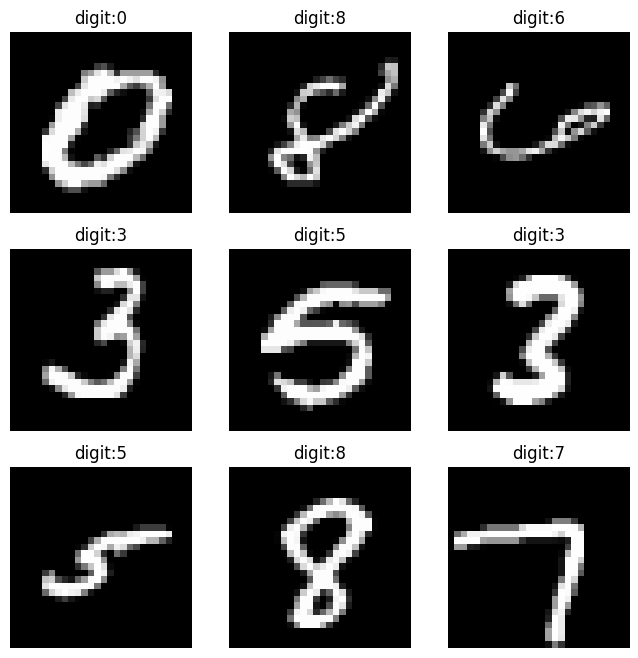

In [68]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
  sample_idx = torch.randint(len(training_data), size=(1,)).item()
  img, label = training_data[sample_idx]
  figure.add_subplot(rows, cols, i)
  plt.title("digit:" + str(label))
  plt.axis("off")
  plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## Preparing your data for training with DataLoaders

The Dataset retrieves our dataset’s features and labels one sample at a time. While
training a model, we typically want to pass samples in “minibatches”, reshuffle the
data at every epoch to reduce model overfitting, and use Python’s multiprocessing
to speed up data retrieval.
DataLoader is an iterable that abstracts this complexity for us in an easy API.

In [69]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(training_data, batch_size=4, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=4, shuffle=True)

## Iterate through the DataLoader
We have loaded that dataset into the DataLoader and can iterate through the dataset
as needed. Each iteration below returns a batch of train features and train labels
(containing batch size=4 features and labels respectively). Because we specified
shuffle=True, after we iterate over all batches the data is shuffled.

Feature batch shape: torch.Size([4, 1, 28, 28])
Labels batch shape: torch.Size([4])


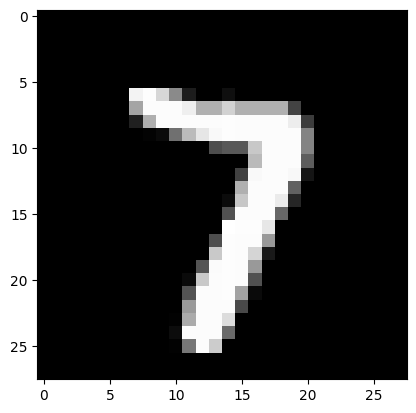

Label: 7


In [70]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

Train the network
This is when things start to get interesting. We simply have to loop over our data
iterator, and feed the inputs to the network and optimize.

In [71]:
for epoch in range(2): # loop over the dataset multiple times
  running_loss = 0.0
  for i, data in enumerate(train_dataloader, 0):
  # get the inputs; data is a list of [inputs, labels]
    inputs, labels = data
  # zero the parameter gradients
    optimizer.zero_grad()
    # forward + backward + optimize
    outputs = net(torch.flatten(inputs,1))
    iteration_loss = loss(outputs, labels)
    iteration_loss.backward()
    optimizer.step()
    # print statistics
    running_loss += iteration_loss.item()
    if i % 2000 == 1999: # print every 2000 mini-batches
      print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss /2000:.3f}')
      running_loss = 0.0
print('Finished Training')

[1,  2000] loss: 2.281
[1,  4000] loss: 2.173
[1,  6000] loss: 1.872
[1,  8000] loss: 1.361
[1, 10000] loss: 0.927
[1, 12000] loss: 0.699
[1, 14000] loss: 0.577
[2,  2000] loss: 0.496
[2,  4000] loss: 0.454
[2,  6000] loss: 0.444
[2,  8000] loss: 0.418
[2, 10000] loss: 0.417
[2, 12000] loss: 0.395
[2, 14000] loss: 0.387
Finished Training


Task 4: What is the meaning of epoch, forward pass, backward pass. What is
the effect of torch.flatten(inputs, 1), and optimizer.step()?



Epoch: The number of complete cycles in which all training data is passed through the neural network at once.

Forward Pass: The process of feeding data through the neural network to calculate the output.

Backward Pass: The process of calculating gradients using backpropagation to update the weights.

torch.flatten(inputs, 1): Flattens the inputs into a 1D shape for each sample, to match the first layer.

optimizer.step(): Uses the gradients determined in the preceding step to update the model weights.


To save our trained model, we can use the following code:

In [72]:
PATH = './my_net.pth'
torch.save(net.state_dict(), PATH)

Test the network on the test data
We have trained the network for 2 passes over the training dataset. But we need to
check if the network has learnt anything at all.
We will check this by predicting the class label that the neural network outputs, and
checking it against the ground-truth. If the prediction is correct, we add the sample
to the list of correct predictions. The outputs are energies for the 10 classes. The
higher the energy for a class, the more the network thinks that the image is of the
particular class. So, we get the prediction by finding the index of the highest energy.
Let’s load back in our saved model (note: saving and re-loading the model wasn’t
necessary here, we only did it to illustrate how to do so):

In [73]:
net = Net()
net.load_state_dict(torch.load(PATH))

<ipython-input-73-8b61435874a9>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(torch.load(PATH))


<All keys matched successfully>

Let’s look at how the network performs on the whole testing dataset.

In [74]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
  for data in test_dataloader:
    images, labels = data
    # calculate outputs by running images through the network
    outputs = net(torch.flatten(images,1))
    # the class with the highest energy is what we choose as prediction
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
print(f'Accuracy of the network on the 10000 test images: {100 * correct// total} %')

Accuracy of the network on the 10000 test images: 89 %


Task 5: Train the network in the previous example, but instead of using 2 hidden
layers, try 3 hidden layers.

In [75]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    # an affine operation: y = Wx + b
    # 784 is the input dimension, and 68 is the output dimenstion o the first hidden layer
    self.fc1 = nn.Linear(784, 64)
    self.fc2 = nn.Linear(64, 64)
    self.fc3 = nn.Linear(64, 64)
    self.fc4 = nn.Linear(64, 10)

  def forward(self, x):
    # apply the first layer with relu activation
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))

    x = self.fc4(x)
    return x

net = Net()
print(net)
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
  for data in test_dataloader:
    images, labels = data
    # calculate outputs by running images through the network
    outputs = net(torch.flatten(images,1))
    # the class with the highest energy is what we choose as prediction
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
print(f'Accuracy of the network on the 10000 test images: {100 * correct// total} %')

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)
Accuracy of the network on the 10000 test images: 12 %


Task 6: Train the network in the previous example using Adam optimizer.

In [76]:
net = Net()
import torch.optim as optim
loss = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)
for epoch in range(2): # loop over the dataset multiple times
  running_loss = 0.0
  for i, data in enumerate(train_dataloader, 0):
  # get the inputs; data is a list of [inputs, labels]
    inputs, labels = data
  # zero the parameter gradients
    optimizer.zero_grad()
    # forward + backward + optimize
    outputs = net(torch.flatten(inputs,1))
    iteration_loss = loss(outputs, labels)
    iteration_loss.backward()
    optimizer.step()
    # print statistics
    running_loss += iteration_loss.item()
    if i % 2000 == 1999: # print every 2000 mini-batches
      print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss /2000:.3f}')
      running_loss = 0.0
print('Finished Training')
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
  for data in test_dataloader:
    images, labels = data
    # calculate outputs by running images through the network
    outputs = net(torch.flatten(images,1))
    # the class with the highest energy is what we choose as prediction
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
print(f'Accuracy of the network on the 10000 test images: {100 * correct// total} %')


[1,  2000] loss: 0.514
[1,  4000] loss: 0.267
[1,  6000] loss: 0.212
[1,  8000] loss: 0.190
[1, 10000] loss: 0.157
[1, 12000] loss: 0.159
[1, 14000] loss: 0.155
[2,  2000] loss: 0.119
[2,  4000] loss: 0.115
[2,  6000] loss: 0.119
[2,  8000] loss: 0.117
[2, 10000] loss: 0.113
[2, 12000] loss: 0.113
[2, 14000] loss: 0.120
Finished Training
Accuracy of the network on the 10000 test images: 97 %


Training on GPU
The training in the previous example was done on CPU. But how do we train our
model on GPU?
Just like how you transfer a Tensor onto the GPU, you transfer the neural net onto
the GPU. Let’s first define our device as the first visible cuda device if we have CUDA
available:

In [77]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# Assuming that we are on a CUDA machine, this should print a CUDA device:
print(device)

cuda:0


The rest of this section assumes that device is a CUDA device.
Then these methods will recursively go over all modules and convert their parameters
and buffers to CUDA tensors:

In [78]:
net.to(device)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)

Remember that you will have to send the inputs and targets at every step to the
GPU too:

In [79]:
inputs, labels = data[0].to(device), data[1].to(device)

Task 7: Train the network in the previous example on GPU. Do you notice significant
speedup? if not, try to increase the size of your network.

before increase the size of  network.

---



In [80]:
loss = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001)

for epoch in range(2): # loop over the dataset multiple times

  running_loss = 0.0
  for i, data in enumerate(train_dataloader, 0):
    # get the inputs; data is a list of [inputs, labels]
    inputs, labels = data[0].to(device), data[1].to(device)
    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    outputs = net(torch.flatten(inputs,1))
    iteration_loss = loss(outputs, labels)
    iteration_loss.backward()
    optimizer.step()

    # print statistics
    running_loss += iteration_loss.item()
    if i % 2000 == 1999: # print every 2000 mini-batches
      print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
      running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 0.062
[1,  4000] loss: 0.060
[1,  6000] loss: 0.060
[1,  8000] loss: 0.056
[1, 10000] loss: 0.058
[1, 12000] loss: 0.065
[1, 14000] loss: 0.059
[2,  2000] loss: 0.056
[2,  4000] loss: 0.046
[2,  6000] loss: 0.053
[2,  8000] loss: 0.052
[2, 10000] loss: 0.054
[2, 12000] loss: 0.052
[2, 14000] loss: 0.053
Finished Training


after increase the size of  network.

In [81]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    # an affine operation: y = Wx + b

    self.fc1 = nn.Linear(784, 128)
    self.fc2 = nn.Linear(128, 128)
    self.fc3 = nn.Linear(128, 128)
    self.fc4 = nn.Linear(128, 10)

  def forward(self, x):
    # apply the first layer with relu activation
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))

    x = self.fc4(x)
    return x

net = Net()
print(net)
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
  for data in test_dataloader:
    images, labels = data
    # calculate outputs by running images through the network
    outputs = net(torch.flatten(images,1))
    # the class with the highest energy is what we choose as prediction
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
print(f'Accuracy of the network on the 10000 test images: {100 * correct// total} %')

Net(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=10, bias=True)
)
Accuracy of the network on the 10000 test images: 4 %


In [82]:
# Check if GPU is available and set the device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Training on {device}")

Training on cuda:0


In [83]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader


# Initialize the model and move it to the GPU (if available)
net = Net().to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Number of epochs
num_epochs = 5

# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_dataloader, 0):
        inputs, labels = data
        # Move inputs and labels to the selected device
        inputs, labels = inputs.to(device), labels.to(device)

        # Flatten inputs for compatibility with the network
        inputs = torch.flatten(inputs, 1)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:  # Print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')




[1,  2000] loss: 0.464
[1,  4000] loss: 0.237
[1,  6000] loss: 0.199
[1,  8000] loss: 0.184
[1, 10000] loss: 0.154
[1, 12000] loss: 0.152
[1, 14000] loss: 0.133
[2,  2000] loss: 0.097
[2,  4000] loss: 0.128
[2,  6000] loss: 0.097
[2,  8000] loss: 0.115
[2, 10000] loss: 0.102
[2, 12000] loss: 0.098
[2, 14000] loss: 0.105
[3,  2000] loss: 0.076
[3,  4000] loss: 0.075
[3,  6000] loss: 0.086
[3,  8000] loss: 0.086
[3, 10000] loss: 0.087
[3, 12000] loss: 0.080
[3, 14000] loss: 0.079
[4,  2000] loss: 0.055
[4,  4000] loss: 0.071
[4,  6000] loss: 0.070
[4,  8000] loss: 0.069
[4, 10000] loss: 0.071
[4, 12000] loss: 0.077
[4, 14000] loss: 0.070
[5,  2000] loss: 0.046
[5,  4000] loss: 0.059
[5,  6000] loss: 0.061
[5,  8000] loss: 0.062
[5, 10000] loss: 0.051
[5, 12000] loss: 0.070
[5, 14000] loss: 0.063
Finished Training


1.4 EXTRA (Optional) - Visualizing models, data,
and training with tensorboard
PyTorch integrates with TensorBoard, a tool designed for visualizing the results of
neural network training runs. This tutorial illustrates some of its functionality.